In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

### Data loading and cleaning

In [70]:
# loading data
churnData = pd.read_csv("DATA_Customer-Churn.csv")

In [71]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [72]:
churnData

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

     OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  \
0                No          Yes               No          No          No   
1               Yes           No              Yes          No          No   
2               Yes          Yes               No          No          No   
3               Yes           No              Yes         Yes          No   
4                No           No               No          No          No   
...             ...          ...              ...         ...         ...   
7038            Yes           No              Yes         Yes         Yes   
7039             No          Yes              Yes          No         Yes   
7040            Yes           No               No          No          No   
7041             No           No               No          No          No   
7042            Yes           No              Yes         Yes         Yes   

     StreamingMovies        Contract  MonthlyCharges TotalCharges Churn  
0                 No  Month-to-month           29.85        29.85    No  
1                 No        One year           56.95       1889.5    No  
2                 No  Month-to-month           53.85       108.15   Yes  
3                 No        One year           42.30      1840.75    No  
4                 No  Month-to-month           70.70       151.65   Yes  
...              ...             ...             ...          ...   ...  
7038             Yes        One year           84.80       1990.5    No  
7039             Yes        One year          103.20       7362.9    No  
7040              No  Month-to-month           29.60       346.45    No  
7041              No  Month-to-month           74.40        306.6   Yes  
7042             Yes        Two year          105.65       6844.5    No  

[7043 rows x 16 columns]

In [73]:
# converting TotalCharges from object to numeric
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'], errors='coerce')

In [74]:
# checking for null values
churnData.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [75]:
# dropping the null values
churnData.dropna(inplace=True)

In [76]:
churnData['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [77]:
# converting Churn into binary
churnData['Churn'] = list(map(lambda x:0 if x=='No' else 1, churnData['Churn']))

### Logistic regression

In [78]:
# X, y split with only tenure, SeniorCitizen, MonthlyCharges and TotalCharges
X = churnData[['tenure','SeniorCitizen','MonthlyCharges','TotalCharges']]
y = churnData['Churn']

In [79]:
# splitting train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

Error_metric     Train      Test
0     Accuracy  0.796627  0.774882
1    Precision  0.657837  0.630170
2       Recall  0.463092  0.445017

C:\Users\Bosco\anaconda3\envs\DA_ENV\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


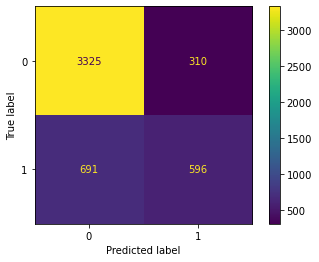

C:\Users\Bosco\anaconda3\envs\DA_ENV\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


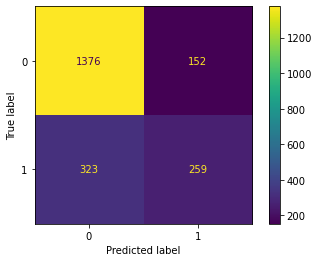

In [80]:
# modelling
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler().fit(X_train)

X_train_mod = std_scaler.transform(X_train)
X_test_mod  = std_scaler.transform(X_test)

log = LogisticRegression() 

log.fit(X_train_mod, y_train)

y_pred_train_log = log.predict(X_train_mod)
y_pred_test_log = log.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

plot_confusion_matrix(log,X_train_mod,y_train, values_format = 'd')
plt.show()

plot_confusion_matrix(log,X_test_mod,y_test, values_format = 'd')
plt.show()

### KNN

In [81]:
from sklearn.neighbors import KNeighborsClassifier

# initialize model (set parameters)
neigh = KNeighborsClassifier(n_neighbors=10)

In [82]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [83]:
y_pred_train_knn = neigh.predict(X_train)
y_pred_test_knn  = neigh.predict(X_test)

In [84]:
# for loop to try many values of k

full = pd.DataFrame()

models = {'k': [] }

for k in range(2,21):

    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)

    models['k'] = [k, neigh]

    y_pred_train_knn = neigh.predict(X_train)
    y_pred_test_knn  = neigh.predict(X_test)

    temp = pd.DataFrame({'k': k,
                       'Error_metric': ['Accuracy','Precision','Recall'],
                       'Train': [accuracy_score(y_train, y_pred_train_log),
                                 precision_score(y_train, y_pred_train_log),
                                 recall_score(y_train, y_pred_train_log)],
                       'Test': [accuracy_score(y_test, y_pred_test_log),
                                precision_score(y_test, y_pred_test_log),
                                recall_score(y_test, y_pred_test_log)]})
    full = pd.concat([full,temp], axis=0)

full

k Error_metric     Train      Test
0   2     Accuracy  0.796627  0.774882
1   2    Precision  0.657837  0.630170
2   2       Recall  0.463092  0.445017
0   3     Accuracy  0.796627  0.774882
1   3    Precision  0.657837  0.630170
2   3       Recall  0.463092  0.445017
0   4     Accuracy  0.796627  0.774882
1   4    Precision  0.657837  0.630170
2   4       Recall  0.463092  0.445017
0   5     Accuracy  0.796627  0.774882
1   5    Precision  0.657837  0.630170
2   5       Recall  0.463092  0.445017
0   6     Accuracy  0.796627  0.774882
1   6    Precision  0.657837  0.630170
2   6       Recall  0.463092  0.445017
0   7     Accuracy  0.796627  0.774882
1   7    Precision  0.657837  0.630170
2   7       Recall  0.463092  0.445017
0   8     Accuracy  0.796627  0.774882
1   8    Precision  0.657837  0.630170
2   8       Recall  0.463092  0.445017
0   9     Accuracy  0.796627  0.774882
1   9    Precision  0.657837  0.630170
2   9       Recall  0.463092  0.445017
0  10     Accuracy  0.796627  0.774882
1  10    Precision  0.657837  0.630170
2  10       Recall  0.463092  0.445017
0  11     Accuracy  0.796627  0.774882
1  11    Precision  0.657837  0.630170
2  11       Recall  0.463092  0.445017
0  12     Accuracy  0.796627  0.774882
1  12    Precision  0.657837  0.630170
2  12       Recall  0.463092  0.445017
0  13     Accuracy  0.796627  0.774882
1  13    Precision  0.657837  0.630170
2  13       Recall  0.463092  0.445017
0  14     Accuracy  0.796627  0.774882
1  14    Precision  0.657837  0.630170
2  14       Recall  0.463092  0.445017
0  15     Accuracy  0.796627  0.774882
1  15    Precision  0.657837  0.630170
2  15       Recall  0.463092  0.445017
0  16     Accuracy  0.796627  0.774882
1  16    Precision  0.657837  0.630170
2  16       Recall  0.463092  0.445017
0  17     Accuracy  0.796627  0.774882
1  17    Precision  0.657837  0.630170
2  17       Recall  0.463092  0.445017
0  18     Accuracy  0.796627  0.774882
1  18    Precision  0.657837  0.630170
2  18       Recall  0.463092  0.445017
0  19     Accuracy  0.796627  0.774882
1  19    Precision  0.657837  0.630170
2  19       Recall  0.463092  0.445017
0  20     Accuracy  0.796627  0.774882
1  20    Precision  0.657837  0.630170
2  20       Recall  0.463092  0.445017

### Decision trees - with only numerical features

Error_metric     Train      Test
0     Accuracy  0.789110  0.773460
1    Precision  0.656999  0.644444
2       Recall  0.404817  0.398625

Confusion matrix for the train set
[[3363  766]
 [ 272  521]]


C:\Users\Bosco\anaconda3\envs\DA_ENV\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


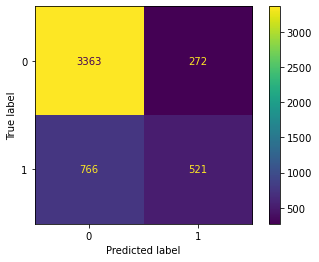



Confusion matrix for the test set
[[1400  350]
 [ 128  232]]


C:\Users\Bosco\anaconda3\envs\DA_ENV\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


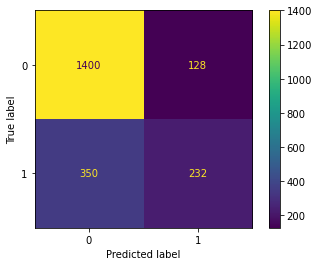

In [85]:
# Modelling
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

dt = DecisionTreeClassifier(max_depth=3)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

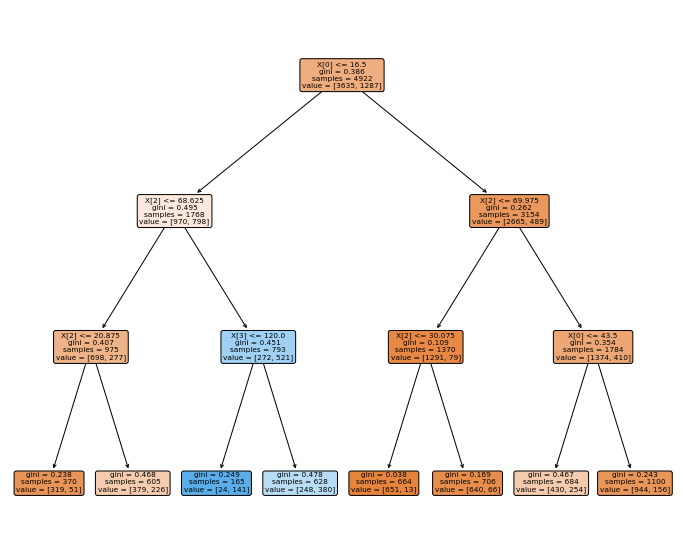

In [86]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12,10))

plot_tree(dt,filled = True, rounded=True)
plt.show() 

In [87]:
# checking performance of differnt max_depth

full = pd.DataFrame()

for i in range(1,10):
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(X_train, y_train)

    y_pred_train_dt = dt.predict(X_train)
    y_pred_test_dt = dt.predict(X_test)


    temp = pd.DataFrame({'Max_depth':i,
                                    'Error_metric': ['Accuracy','Precision','Recall'],
                                   'Train': [accuracy_score(y_train, y_pred_train_dt),
                                             precision_score(y_train, y_pred_train_dt),
                                             recall_score(y_train, y_pred_train_dt)],
                                   'Test': [accuracy_score(y_test, y_pred_test_dt),
                                            precision_score(y_test, y_pred_test_dt),
                                            recall_score(y_test, y_pred_test_dt)]})
    full = pd.concat([full,temp], axis=0)

display(full)

C:\Users\Bosco\anaconda3\envs\DA_ENV\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bosco\anaconda3\envs\DA_ENV\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Max_depth Error_metric     Train      Test
0          1     Accuracy  0.738521  0.724171
1          1    Precision  0.000000  0.000000
2          1       Recall  0.000000  0.000000
0          2     Accuracy  0.789110  0.773460
1          2    Precision  0.656999  0.644444
2          2       Recall  0.404817  0.398625
0          3     Accuracy  0.789110  0.773460
1          3    Precision  0.656999  0.644444
2          3       Recall  0.404817  0.398625
0          4     Accuracy  0.794799  0.763033
1          4    Precision  0.689466  0.618497
2          4       Recall  0.391608  0.367698
0          5     Accuracy  0.805161  0.764929
1          5    Precision  0.648014  0.579336
2          5       Recall  0.557887  0.539519
0          6     Accuracy  0.810849  0.770142
1          6    Precision  0.694748  0.608018
2          6       Recall  0.493395  0.469072
0          7     Accuracy  0.819382  0.759242
1          7    Precision  0.693204  0.573705
2          7       Recall  0.554779  0.494845
0          8     Accuracy  0.830963  0.750237
1          8    Precision  0.692960  0.548501
2          8       Recall  0.634810  0.534364
0          9     Accuracy  0.843560  0.747867
1          9    Precision  0.753680  0.551230
2          9       Recall  0.596737  0.462199

### Decision trees with all features

In [88]:
# getting only numerical features
numericals = churnData._get_numeric_data().drop(columns='Churn')
numericals.reset_index(inplace=True)

In [89]:
# getting only categorical features
categoricals = churnData.select_dtypes('object')
categoricals

gender Partner Dependents PhoneService OnlineSecurity OnlineBackup  \
0     Female     Yes         No           No             No          Yes   
1       Male      No         No          Yes            Yes           No   
2       Male      No         No          Yes            Yes          Yes   
3       Male      No         No           No            Yes           No   
4     Female      No         No          Yes             No           No   
...      ...     ...        ...          ...            ...          ...   
7038    Male     Yes        Yes          Yes            Yes           No   
7039  Female     Yes        Yes          Yes             No          Yes   
7040  Female     Yes        Yes           No            Yes           No   
7041    Male     Yes         No          Yes             No           No   
7042    Male      No         No          Yes            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  
0                  No          No          No              No  Month-to-month  
1                 Yes          No          No              No        One year  
2                  No          No          No              No  Month-to-month  
3                 Yes         Yes          No              No        One year  
4                  No          No          No              No  Month-to-month  
...               ...         ...         ...             ...             ...  
7038              Yes         Yes         Yes             Yes        One year  
7039              Yes          No         Yes             Yes        One year  
7040               No          No          No              No  Month-to-month  
7041               No          No          No              No  Month-to-month  
7042              Yes         Yes         Yes             Yes        Two year  

[7032 rows x 11 columns]

In [90]:
categoricals.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract'],
      dtype='object')

In [91]:
for col_name in categoricals.columns :
    print(categoricals[str(col_name)].value_counts().index)
    print()

Index(['Male', 'Female'], dtype='object')

Index(['No', 'Yes'], dtype='object')

Index(['No', 'Yes'], dtype='object')

Index(['Yes', 'No'], dtype='object')

Index(['No', 'Yes', 'No internet service'], dtype='object')

Index(['No', 'Yes', 'No internet service'], dtype='object')

Index(['No', 'Yes', 'No internet service'], dtype='object')

Index(['No', 'Yes', 'No internet service'], dtype='object')

Index(['No', 'Yes', 'No internet service'], dtype='object')

Index(['No', 'Yes', 'No internet service'], dtype='object')

Index(['Month-to-month', 'Two year', 'One year'], dtype='object')



In [92]:
from sklearn.preprocessing import OrdinalEncoder

categories = [['Male', 'Female'], ['No', 'Yes'], ['No', 'Yes'], ['No', 'Yes'], ['No internet service', 'No', 'Yes'], ['No internet service', 'No', 'Yes'], ['No internet service', 'No', 'Yes'], ['No internet service', 'No', 'Yes'], ['No internet service', 'No', 'Yes'], ['No internet service', 'No', 'Yes'], ['Month-to-month', 'One year', 'Two year']] 
ordinal_encoder = OrdinalEncoder(categories=categories)
categoricals_encoded = pd.DataFrame(ordinal_encoder.fit_transform(categoricals),
                                 columns=categoricals.columns)

In [93]:
categoricals_encoded

gender  Partner  Dependents  PhoneService  OnlineSecurity  OnlineBackup  \
0        1.0      1.0         0.0           0.0             1.0           2.0   
1        0.0      0.0         0.0           1.0             2.0           1.0   
2        0.0      0.0         0.0           1.0             2.0           2.0   
3        0.0      0.0         0.0           0.0             2.0           1.0   
4        1.0      0.0         0.0           1.0             1.0           1.0   
...      ...      ...         ...           ...             ...           ...   
7027     0.0      1.0         1.0           1.0             2.0           1.0   
7028     1.0      1.0         1.0           1.0             1.0           2.0   
7029     1.0      1.0         1.0           0.0             2.0           1.0   
7030     0.0      1.0         0.0           1.0             1.0           1.0   
7031     0.0      0.0         0.0           1.0             2.0           1.0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  
0                  1.0          1.0          1.0              1.0       0.0  
1                  2.0          1.0          1.0              1.0       1.0  
2                  1.0          1.0          1.0              1.0       0.0  
3                  2.0          2.0          1.0              1.0       1.0  
4                  1.0          1.0          1.0              1.0       0.0  
...                ...          ...          ...              ...       ...  
7027               2.0          2.0          2.0              2.0       1.0  
7028               2.0          1.0          2.0              2.0       1.0  
7029               1.0          1.0          1.0              1.0       0.0  
7030               1.0          1.0          1.0              1.0       0.0  
7031               2.0          2.0          2.0              2.0       2.0  

[7032 rows x 11 columns]

In [94]:
# combining numericals and categoricals
all_features = pd.concat([numericals, categoricals_encoded], axis=1)

In [95]:
# X, y split including categorical columns
X = all_features
y = churnData['Churn']

Error_metric     Train      Test
0     Accuracy  0.791548  0.776303
1    Precision  0.677551  0.664671
2       Recall  0.386946  0.381443

Confusion matrix for the train set
[[3398  789]
 [ 237  498]]


C:\Users\Bosco\anaconda3\envs\DA_ENV\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


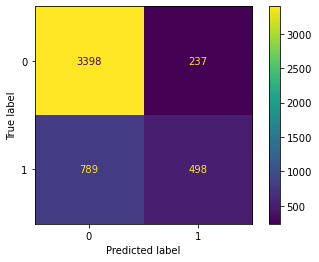



Confusion matrix for the test set
[[1416  360]
 [ 112  222]]


C:\Users\Bosco\anaconda3\envs\DA_ENV\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


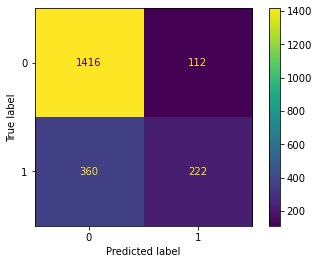

In [96]:
# Modelling

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

dt = DecisionTreeClassifier(max_depth=3)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

In [97]:
# checking performance of differnt max_depth

full = pd.DataFrame()

for i in range(1,10):
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(X_train, y_train)

    y_pred_train_dt = dt.predict(X_train)
    y_pred_test_dt = dt.predict(X_test)


    temp = pd.DataFrame({'Max_depth':i,
                                    'Error_metric': ['Accuracy','Precision','Recall'],
                                   'Train': [accuracy_score(y_train, y_pred_train_dt),
                                             precision_score(y_train, y_pred_train_dt),
                                             recall_score(y_train, y_pred_train_dt)],
                                   'Test': [accuracy_score(y_test, y_pred_test_dt),
                                            precision_score(y_test, y_pred_test_dt),
                                            recall_score(y_test, y_pred_test_dt)]})
    full = pd.concat([full,temp], axis=0)

display(full)

C:\Users\Bosco\anaconda3\envs\DA_ENV\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bosco\anaconda3\envs\DA_ENV\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Max_depth Error_metric     Train      Test
0          1     Accuracy  0.738521  0.724171
1          1    Precision  0.000000  0.000000
2          1       Recall  0.000000  0.000000
0          2     Accuracy  0.756806  0.737915
1          2    Precision  0.529145  0.521674
2          2       Recall  0.634810  0.599656
0          3     Accuracy  0.791548  0.776303
1          3    Precision  0.677551  0.664671
2          3       Recall  0.386946  0.381443
0          4     Accuracy  0.794799  0.776777
1          4    Precision  0.631779  0.613963
2          4       Recall  0.515929  0.513746
0          5     Accuracy  0.803941  0.768246
1          5    Precision  0.702771  0.622691
2          5       Recall  0.433566  0.405498
0          6     Accuracy  0.815319  0.773460
1          6    Precision  0.678977  0.603586
2          6       Recall  0.557110  0.520619
0          7     Accuracy  0.824258  0.764455
1          7    Precision  0.695009  0.582524
2          7       Recall  0.584305  0.515464
0          8     Accuracy  0.841528  0.747867
1          8    Precision  0.719861  0.547170
2          8       Recall  0.644911  0.498282
0          9     Accuracy  0.861032  0.753081
1          9    Precision  0.745321  0.553415
2          9       Recall  0.711733  0.542955

### K-fold cross validation

In [98]:
# X, y split with only tenure, SeniorCitizen, MonthlyCharges and TotalCharges
X = churnData[['tenure','SeniorCitizen','MonthlyCharges','TotalCharges']]
y = churnData['Churn']

In [99]:
# Comparing models
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

model1 = DecisionTreeClassifier()

model2 = LogisticRegression()

model3 = KNeighborsClassifier()


model_pipeline = [model1, model2, model3]
model_names = ['Decision Tree', 'Logistic Regression', 'KNN']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=10))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

C:\Users\Bosco\anaconda3\envs\DA_ENV\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Bosco\anaconda3\envs\DA_ENV\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

{'Decision Tree': 0.732022295882188, 'Logistic Regression': 0.7956125595738717, 'KNN': 0.7267406289681558}


### Managing imbalance in the dataset

In [100]:
data = churnData.select_dtypes('number')
data

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn
0                 0       1           29.85         29.85      0
1                 0      34           56.95       1889.50      0
2                 0       2           53.85        108.15      1
3                 0      45           42.30       1840.75      0
4                 0       2           70.70        151.65      1
...             ...     ...             ...           ...    ...
7038              0      24           84.80       1990.50      0
7039              0      72          103.20       7362.90      0
7040              0      11           29.60        346.45      0
7041              1       4           74.40        306.60      1
7042              0      66          105.65       6844.50      0

[7032 rows x 5 columns]

In [101]:
# checking data imbalance
category_0 = data[data['Churn'] == 0]
category_1 = data[data['Churn'] == 1]

print(category_0.shape)
print(category_1.shape)

(5163, 5)
(1869, 5)


### Managing imbalance in the dataset - downsampling

In [102]:
# downsampling
category_0_down = category_0.sample(len(category_1,))
print(category_0_down.shape)
print(category_1.shape)

(1869, 5)
(1869, 5)


In [103]:
# concatenating the samples
data = pd.concat([category_0_down, category_1], axis=0)

In [104]:
# shuffling the data
data = data.sample(frac=1)
data['Churn'].value_counts()

1    1869
0    1869
Name: Churn, dtype: int64

In [105]:
# X, y split
X = data.drop(['Churn'], axis=1)
y = data['Churn']

In [106]:
# comparing models

model1 = LogisticRegression()
model2 = KNeighborsClassifier()
model3 = DecisionTreeClassifier(max_depth=3)

model_pipeline = [model1, model2, model3]
model_names = ['LogReg', 'KNNClass', 'DTClass']

performance_comparison_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall']})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

i=0

for model in model_pipeline:
    if model == model1:
        std_scaler = StandardScaler().fit(X_train)
        X_train = std_scaler.transform(X_train)
        X_test  = std_scaler.transform(X_test)

    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               model_names[i]+'_Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               model_names[i]+'_Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})
    performance_comparison_df = performance_comparison_df.merge(performance_df, how='inner', on='Error_metric')
    i = i+1
    
performance_comparison_df

Error_metric  LogReg_Train  LogReg_Test  KNNClass_Train  KNNClass_Test  \
0     Accuracy      0.735856     0.745098        0.805810       0.721925   
1    Precision      0.733333     0.734694        0.794834       0.712585   
2       Recall      0.740627     0.768683        0.824024       0.745552   

   DTClass_Train  DTClass_Test  
0       0.728211      0.727273  
1       0.680169      0.680282  
2       0.860750      0.859431

### Managing imbalance in the dataset - upsampling

In [107]:
# upsampling
category_1_up = category_1.sample(len(category_0,), replace=True)
print(category_0.shape)
print(category_1_up.shape)

(5163, 5)
(5163, 5)


In [108]:
# concatenating the samples
data = pd.concat([category_0, category_1_up], axis=0)

In [109]:
# shuffling the data
data = data.sample(frac=1)
data['Churn'].value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

In [110]:
# X, y split
X = data.drop(['Churn'], axis=1)
y = data['Churn']

In [111]:
# comparing models
X = data.drop(['Churn'], axis=1)
y = data['Churn']

model1 = LogisticRegression()
model2 = KNeighborsClassifier()
model3 = DecisionTreeClassifier(max_depth=3)

model_pipeline = [model1, model2, model3]
model_names = ['LogReg', 'KNNClass', 'DTClass']

performance_comparison_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall']})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

i=0

for model in model_pipeline:
    if model == model1:
        std_scaler = StandardScaler().fit(X_train)
        X_train = std_scaler.transform(X_train)
        X_test  = std_scaler.transform(X_test)

    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               model_names[i]+'_Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               model_names[i]+'_Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})
    performance_comparison_df = performance_comparison_df.merge(performance_df, how='inner', on='Error_metric')
    i = i+1
    
performance_comparison_df

Error_metric  LogReg_Train  LogReg_Test  KNNClass_Train  KNNClass_Test  \
0     Accuracy      0.730631     0.724015        0.843248       0.763719   
1    Precision      0.727173     0.718301        0.802246       0.733788   
2       Recall      0.737046     0.740026        0.910502       0.830116   

   DTClass_Train  DTClass_Test  
0       0.737410      0.727566  
1       0.724012      0.712321  
2       0.766140      0.766409

### Managing imbalance in the dataset - upsampling using SMOTE

In [112]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [113]:
data = churnData.select_dtypes('number')
X = data.drop(['Churn'], axis=1)
y = data['Churn']

In [114]:
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [115]:
# comparing models

model1 = LogisticRegression()
model2 = KNeighborsClassifier()
model3 = DecisionTreeClassifier(max_depth=3)

model_pipeline = [model1, model2, model3]
model_names = ['LogReg', 'KNNClass', 'DTClass']

performance_comparison_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall']})

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.30, random_state=100)

i=0

for model in model_pipeline:
    if model == model1:
        std_scaler = StandardScaler().fit(X_train)
        X_train = std_scaler.transform(X_train)
        X_test  = std_scaler.transform(X_test)

    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               model_names[i]+'_Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               model_names[i]+'_Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})
    performance_comparison_df = performance_comparison_df.merge(performance_df, how='inner', on='Error_metric')
    i = i+1
    
performance_comparison_df

Error_metric  LogReg_Train  LogReg_Test  KNNClass_Train  KNNClass_Test  \
0     Accuracy      0.738932     0.744028        0.830382       0.754680   
1    Precision      0.721660     0.728453        0.814657       0.752030   
2       Recall      0.773637     0.787492        0.853170       0.768347   

   DTClass_Train  DTClass_Test  
0       0.746541      0.741446  
1       0.707140      0.703940  
2       0.837319      0.843650